In [1]:
#clone YOLOv5 and
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 17045, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 17045 (delta 10), reused 18 (delta 8), pack-reused 17022 (from 1)
Receiving objects: 100% (17045/17045), 15.67 MiB | 7.88 MiB/s, done.
Resolving deltas: 100% (11704/11704), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.0/887.0 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.7 MB/s eta 0:00:00
Setup complete. Using torch 2.5.1+cu121 (Tesla T4)


In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="x1FbJ9OqOYcOmknQHObN")
project = rf.workspace("ziadmohamed-xi9fa").project("pedstrians")
version = project.version(1)
dataset = version.download("yolov5")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to pedstrians-1 in yolov5pytorch:: 100%|██████████| 2664/2664 [00:00<00:00, 4023.23it/s]


In [3]:
from google.colab import drive
# Kết nối Google Drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [5]:
%cd yolov5

[Errno 2] No such file or directory: 'yolov5'
/content/yolov5


In [6]:
!python train.py --img 416 --batch 16 --epochs  100 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  with torch.cuda.amp.autocast(amp):
      58/99      1.95G    0.02432    0.03391          0        209        416:  79% 46/58 [00:08<00:02,  5.90it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      58/99      1.95G    0.02431    0.03383          0        174        416:  81% 47/58 [00:08<00:02,  5.14it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      58/99      1.95G    0.02433     0.0337          0        152        416:  83% 48/58 [00:08<00:01,  5.31it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(

In [7]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/yolov5/pedstrians-1/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-383-g1435a8ee Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/133 /content/yolov5/pedstrians-1/test/images/F03_png_jpg.rf.63a97c081b576d311ff7bf62bcff290e.jpg: 416x416 1 person, 7.1ms
image 2/133 /content/yolov5/pedstrians-1/test/images/F11_png_jpg.rf.367a97dc0395b6672e1dc21dc50bee16.jpg: 416x416 1 person

In [8]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

Output hidden; open in https://colab.research.google.com to view.

In [9]:
#export your model's weights for future use
from google.colab import files
files.download('./runs/train/exp/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!python detect.py --weights yolov5s.pt --source /content/pedestrian-crossing.jpg


detect: weights=['yolov5s.pt'], source=/content/pedestrian-crossing.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-383-g1435a8ee Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/pedestrian-crossing.jpg: 448x640 6 persons, 2 cars, 3 traffic lights, 1 backpack, 1 handbag, 30.2ms
Speed: 0.5ms pre-process, 30.2ms inference, 619.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


In [ ]:
!python detect.py --weights yolov5s.pt --source /content/pedestrian-crossing.jpg --classes 0


detect: weights=['yolov5s.pt'], source=/content/pedestrian-crossing.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=[0], agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-383-g1435a8ee Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/pedestrian-crossing.jpg: 448x640 6 persons, 33.9ms
Speed: 0.5ms pre-process, 33.9ms inference, 607.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


In [ ]:
import sys
sys.path.append('/content/yolov5')  # Thay bằng đường dẫn thực tế của thư mục yolov5

In [15]:
import shutil

# Định nghĩa đường dẫn
source_path = '/content/yolov5/runs/train/exp'
destination_path = '/content/gdrive/MyDrive/train-model/trained/'

# Copy thư mục
try:
    shutil.copytree(source_path, destination_path, dirs_exist_ok=True)
    print(f"Thư mục đã được copy từ {source_path} đến {destination_path}.")
except Exception as e:
    print(f"Đã xảy ra lỗi khi copy: {e}")


Thư mục đã được copy từ /content/yolov5/runs/train/exp đến /content/gdrive/MyDrive/train-model/trained/.


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-383-g1435a8ee Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
Saved 1 image to runs/detect/exp5


Number of persons detected: 6


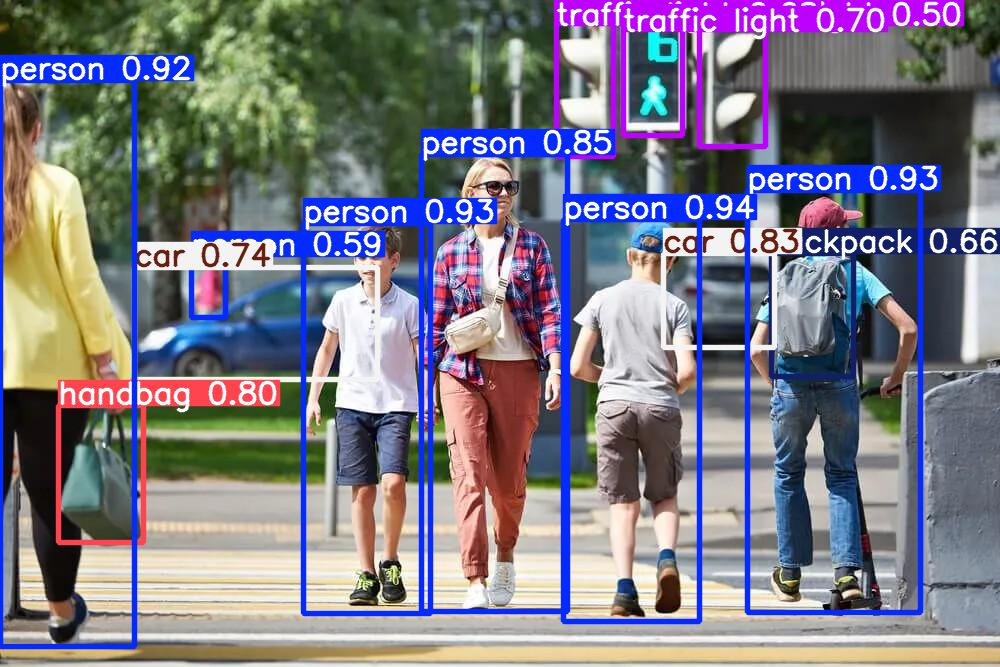

In [ ]:
import torch
from IPython.display import Image, display

# Tải mô hình YOLOv5 từ Torch Hub
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Dự đoán trên ảnh
results = model('/content/pedestrian-crossing.jpg')

# Lọc kết quả: chỉ giữ lại đối tượng "person" (class = 0)
detections = results.pred[0]  # Kết quả phát hiện
person_detections = detections[detections[:, -1] == 0]  # Lọc theo class ID
num_persons = len(person_detections)

print(f"Number of persons detected: {num_persons}")

# Lưu và hiển thị kết quả
results.save()  # Lưu ảnh vào thư mục runs/detect/
display(Image(filename='runs/detect/exp4/pedestrian-crossing.jpg'))


In [ ]:
import torch
from PIL import Image, ImageDraw
import numpy as np

# Tải mô hình YOLOv5 từ Torch Hub
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Dự đoán trên ảnh
image_path = '/content/pedestrian-crossing.jpg'
results = model(image_path)

# Lọc kết quả: chỉ giữ lại đối tượng "person" (class = 0)
detections = results.pred[0]  # Kết quả phát hiện
person_detections = detections[detections[:, -1] == 0]  # Lọc theo class ID

# Số lượng người phát hiện được
num_persons = len(person_detections)
print(f"Number of persons detected: {num_persons}")

# Mở ảnh gốc để vẽ bounding box
image = Image.open(image_path).convert("RGB")
draw = ImageDraw.Draw(image)

# Vẽ bounding box cho "person"
for *box, conf, cls in person_detections:
    x1, y1, x2, y2 = map(int, box)  # Toạ độ bounding box
    draw.rectangle([x1, y1, x2, y2], outline="red", width=3)
    draw.text((x1, y1 - 10), f"Person {conf:.2f}", fill="red")

# Lưu ảnh kết quả
output_path = 'runs/detect/output/person_detected.jpg'
image.save(output_path)
print(f"Filtered image saved to {output_path}")

# Hiển thị ảnh kết quả
image.show()


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-383-g1435a8ee Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.


Number of persons detected: 6
Filtered image saved to runs/detect/output/person_detected.jpg


In [ ]:
import torch
from PIL import Image, ImageDraw
import numpy as np

# Tải mô hình YOLOv5 từ Torch Hub
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Dự đoán trên ảnh
image_path = '/content/pedestrian-deathes-california.jpg'
results = model(image_path)

# Lọc kết quả: chỉ giữ lại đối tượng "person" (class = 0)
detections = results.pred[0]  # Kết quả phát hiện
person_detections = detections[detections[:, -1] == 0]  # Lọc theo class ID

# Số lượng người phát hiện được
num_persons = len(person_detections)
print(f"Number of persons detected: {num_persons}")

# Mở ảnh gốc để vẽ bounding box
image = Image.open(image_path).convert("RGB")
draw = ImageDraw.Draw(image)

# Vẽ bounding box cho "person"
for *box, conf, cls in person_detections:
    x1, y1, x2, y2 = map(int, box)  # Toạ độ bounding box
    draw.rectangle([x1, y1, x2, y2], outline="red", width=3)
    draw.text((x1, y1 - 10), f"Person {conf:.2f}", fill="red")

# Lưu ảnh kết quả
output_path = 'runs/detect/output/person_detected1.jpg'
image.save(output_path)
print(f"Filtered image saved to {output_path}")

# Hiển thị ảnh kết quả
image.show()


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-383-g1435a8ee Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.


Number of persons detected: 13
Filtered image saved to runs/detect/output/person_detected1.jpg


In [ ]:
import torch
from PIL import Image, ImageDraw
import numpy as np

# Tải mô hình YOLOv5 từ Torch Hub
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Dự đoán trên ảnh
image_path = '/content/pedestrians.jpg'
results = model(image_path)

# Lọc kết quả: chỉ giữ lại đối tượng "person" (class = 0)
detections = results.pred[0]  # Kết quả phát hiện
person_detections = detections[detections[:, -1] == 0]  # Lọc theo class ID

# Số lượng người phát hiện được
num_persons = len(person_detections)
print(f"Number of persons detected: {num_persons}")

# Mở ảnh gốc để vẽ bounding box
image = Image.open(image_path).convert("RGB")
draw = ImageDraw.Draw(image)

# Vẽ bounding box cho "person"
for *box, conf, cls in person_detections:
    x1, y1, x2, y2 = map(int, box)  # Toạ độ bounding box
    draw.rectangle([x1, y1, x2, y2], outline="red", width=3)
    draw.text((x1, y1 - 10), f"Person {conf:.2f}", fill="red")

# Lưu ảnh kết quả
output_path = 'runs/detect/output/person_detected2.jpg'
image.save(output_path)
print(f"Filtered image saved to {output_path}")

# Hiển thị ảnh kết quả
image.show()


/usr/local/lib/python3.10/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
import cv2
import torch
import numpy as np

# Tải mô hình YOLOv5 từ Torch Hub
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Đường dẫn video
video_path = '/content/CCTV-People.mp4'
output_path = '/content/person_detected_output.mp4'

# Mở video
cap = cv2.VideoCapture(video_path)
fps = int(cap.get(cv2.CAP_PROP_FPS))  # Lấy số frame/giây
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))  # Chiều rộng video
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))  # Chiều cao video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Định dạng video đầu ra
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

# Xử lý từng frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break  # Kết thúc video

    # Chuyển frame từ BGR (OpenCV) sang RGB (YOLOv5 yêu cầu)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Dự đoán đối tượng trong frame
    results = model(rgb_frame)
    detections = results.pred[0]  # Kết quả phát hiện

    # Lọc kết quả: chỉ giữ lại đối tượng "person" (class = 0)
    person_detections = detections[detections[:, -1] == 0]

    # Vẽ bounding box cho mỗi "person"
    for *box, conf, cls in person_detections:
        x1, y1, x2, y2 = map(int, box)  # Tọa độ bounding box
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Vẽ hình chữ nhật
        cv2.putText(frame, f"Person {conf:.2f}", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)  # Thêm nhãn

    # Ghi frame đã được xử lý vào video đầu ra
    out.write(frame)

    # Hiển thị frame (tùy chọn, có thể bỏ qua)
    # cv2.imshow('Frame', frame)
    # if cv2.waitKey(1) & 0xFF == ord('q'):
    #     break

# Giải phóng tài nguyên
cap.release()
out.release()
cv2.destroyAllWindows()

print(f"Processed video saved to {output_path}")


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-383-g1435a8ee Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocas

Processed video saved to /content/person_detected_output.mp4


In [ ]:
import cv2
import torch

# Tải mô hình YOLOv5 từ Torch Hub
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Đường dẫn video
video_path = '/content/CCTV-People.mp4'
output_path = '/content/person_detected_output_with_count.mp4'

# Mở video
cap = cv2.VideoCapture(video_path)
fps = int(cap.get(cv2.CAP_PROP_FPS))  # Lấy số frame/giây
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))  # Chiều rộng video
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))  # Chiều cao video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Định dạng video đầu ra
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

# Xử lý từng frame
frame_count = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break  # Kết thúc video

    frame_count += 1

    # Chuyển frame từ BGR (OpenCV) sang RGB (YOLOv5 yêu cầu)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Dự đoán đối tượng trong frame
    results = model(rgb_frame)
    detections = results.pred[0]  # Kết quả phát hiện

    # Lọc kết quả: chỉ giữ lại đối tượng "person" (class = 0)
    person_detections = detections[detections[:, -1] == 0]

    # Số lượng người phát hiện được trong frame
    num_persons = len(person_detections)
    print(f"Frame {frame_count}: {num_persons} person(s) detected.")

    # Vẽ bounding box cho mỗi "person"
    for *box, conf, cls in person_detections:
        x1, y1, x2, y2 = map(int, box)  # Tọa độ bounding box
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Vẽ hình chữ nhật
        cv2.putText(frame, f"Person {conf:.2f}", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)  # Thêm nhãn

    # Hiển thị tổng số người trên frame
    cv2.putText(frame, f"Total Persons: {num_persons}", (20, 50),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Ghi frame đã được xử lý vào video đầu ra
    out.write(frame)

    # Hiển thị frame (tùy chọn, có thể bỏ qua)
    # cv2.imshow('Frame', frame)
    # if cv2.waitKey(1) & 0xFF == ord('q'):
    #     break

# Giải phóng tài nguyên
cap.release()
out.release()
cv2.destroyAllWindows()

print(f"Processed video saved to {output_path}")


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-383-g1435a8ee Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocas

Frame 1: 4 person(s) detected.
Frame 2: 4 person(s) detected.
Frame 3: 4 person(s) detected.
Frame 4: 4 person(s) detected.
Frame 5: 4 person(s) detected.
Frame 6: 4 person(s) detected.
Frame 7: 4 person(s) detected.
Frame 8: 4 person(s) detected.
Frame 9: 4 person(s) detected.
Frame 10: 4 person(s) detected.
Frame 11: 4 person(s) detected.
Frame 12: 4 person(s) detected.
Frame 13: 4 person(s) detected.
Frame 14: 4 person(s) detected.


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(arg

Frame 15: 4 person(s) detected.
Frame 16: 4 person(s) detected.
Frame 17: 4 person(s) detected.
Frame 18: 4 person(s) detected.
Frame 19: 4 person(s) detected.
Frame 20: 4 person(s) detected.
Frame 21: 4 person(s) detected.
Frame 22: 4 person(s) detected.
Frame 23: 4 person(s) detected.
Frame 24: 4 person(s) detected.
Frame 25: 4 person(s) detected.
Frame 26: 4 person(s) detected.
Frame 27: 4 person(s) detected.
Frame 28: 4 person(s) detected.


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(arg

Frame 29: 4 person(s) detected.
Frame 30: 4 person(s) detected.
Frame 31: 4 person(s) detected.
Frame 32: 4 person(s) detected.
Frame 33: 4 person(s) detected.
Frame 34: 4 person(s) detected.
Frame 35: 4 person(s) detected.
Frame 36: 4 person(s) detected.
Frame 37: 4 person(s) detected.
Frame 38: 4 person(s) detected.
Frame 39: 4 person(s) detected.
Frame 40: 4 person(s) detected.
Frame 41: 4 person(s) detected.
Frame 42: 4 person(s) detected.


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(arg

Frame 43: 4 person(s) detected.
Frame 44: 4 person(s) detected.
Frame 45: 4 person(s) detected.
Frame 46: 4 person(s) detected.
Frame 47: 4 person(s) detected.
Frame 48: 4 person(s) detected.
Frame 49: 4 person(s) detected.
Frame 50: 4 person(s) detected.
Frame 51: 4 person(s) detected.
Frame 52: 4 person(s) detected.
Frame 53: 4 person(s) detected.
Frame 54: 4 person(s) detected.
Frame 55: 4 person(s) detected.
Frame 56: 4 person(s) detected.
Frame 57: 4 person(s) detected.


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(arg

Frame 58: 4 person(s) detected.
Frame 59: 4 person(s) detected.
Frame 60: 4 person(s) detected.
Frame 61: 4 person(s) detected.
Frame 62: 4 person(s) detected.
Frame 63: 4 person(s) detected.
Frame 64: 4 person(s) detected.
Frame 65: 4 person(s) detected.
Frame 66: 4 person(s) detected.
Frame 67: 4 person(s) detected.
Frame 68: 4 person(s) detected.
Frame 69: 4 person(s) detected.
Frame 70: 4 person(s) detected.
Frame 71: 4 person(s) detected.
Frame 72: 4 person(s) detected.


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(arg

Frame 73: 4 person(s) detected.
Frame 74: 4 person(s) detected.
Frame 75: 4 person(s) detected.
Frame 76: 4 person(s) detected.
Frame 77: 4 person(s) detected.
Frame 78: 4 person(s) detected.
Frame 79: 4 person(s) detected.
Frame 80: 4 person(s) detected.
Frame 81: 4 person(s) detected.
Frame 82: 4 person(s) detected.
Frame 83: 4 person(s) detected.
Frame 84: 4 person(s) detected.
Frame 85: 4 person(s) detected.
Frame 86: 4 person(s) detected.
Frame 87: 4 person(s) detected.


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(arg

Frame 88: 4 person(s) detected.
Frame 89: 4 person(s) detected.
Frame 90: 4 person(s) detected.
Frame 91: 4 person(s) detected.
Frame 92: 4 person(s) detected.
Frame 93: 4 person(s) detected.
Frame 94: 4 person(s) detected.
Frame 95: 4 person(s) detected.
Frame 96: 4 person(s) detected.
Frame 97: 4 person(s) detected.
Frame 98: 4 person(s) detected.
Frame 99: 4 person(s) detected.
Frame 100: 4 person(s) detected.
Frame 101: 4 person(s) detected.
Frame 102: 4 person(s) detected.
Frame 103: 4 person(s) detected.


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(arg

Frame 104: 4 person(s) detected.
Frame 105: 4 person(s) detected.
Frame 106: 4 person(s) detected.
Frame 107: 4 person(s) detected.
Frame 108: 4 person(s) detected.
Frame 109: 4 person(s) detected.
Frame 110: 4 person(s) detected.
Frame 111: 4 person(s) detected.
Frame 112: 4 person(s) detected.
Frame 113: 4 person(s) detected.
Frame 114: 4 person(s) detected.
Frame 115: 4 person(s) detected.
Frame 116: 4 person(s) detected.
Frame 117: 4 person(s) detected.


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(arg

Frame 118: 4 person(s) detected.
Frame 119: 4 person(s) detected.
Frame 120: 4 person(s) detected.
Frame 121: 4 person(s) detected.
Frame 122: 4 person(s) detected.
Frame 123: 4 person(s) detected.
Frame 124: 4 person(s) detected.
Frame 125: 4 person(s) detected.
Frame 126: 4 person(s) detected.
Frame 127: 4 person(s) detected.
Frame 128: 4 person(s) detected.
Frame 129: 4 person(s) detected.
Frame 130: 4 person(s) detected.
Frame 131: 4 person(s) detected.
Frame 132: 4 person(s) detected.
Processed video saved to /content/person_detected_output_with_count.mp4


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
